In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os




# Data Augmentation

In [3]:
Data_Directory = './Data/25-02-10'
# Data_Directory = './Data/23_Dec_Readings'
# file = './Data_1/ble_datalog_2024-09-12_16-05-30.csv'

In [4]:
import re
# Special consideration is taken for grid location (6,0) as it data could not be found

def convert_log_to_dict(log_string):
    # Regular expression to extract the necessary information
    pattern = r"\d+\. (ble_datalog__Rx_\d__\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}) \(grid (\d+),(\d+)\)"
    matches = re.findall(pattern, log_string)

    # Constructing the dictionary in the desired format
    result = {}
    for match in matches:
        filename = f"{match[0]}.csv"
        grid_coordinates = (int(match[1]), int(match[2]))
        result[filename] = grid_coordinates

    return result

# Input log string
log_string = """

1. ble_datalog__Rx_0__2025-02-10_03-01-34 (grid 0,0)
2. ble_datalog__Rx_0__2025-02-10_06-23-17 (grid 1,1)
3. ble_datalog__Rx_0__2025-02-10_06-48-22 (grid 1,4)
4. ble_datalog__Rx_0__2025-02-10_07-30-50 (grid 0,4)
5. ble_datalog__Rx_0__2025-02-10_08-06-33 (grid 1,6)
6. ble_datalog__Rx_0__2025-02-10_08-51-25 (grid 2,7)
7. ble_datalog__Rx_0__2025-02-18_03-53-43 (grid 2,4)
8. ble_datalog__Rx_0__2025-02-18_04-17-55 (grid 2,2)
9. ble_datalog__Rx_0__2025-02-18_04-42-05 (grid 2,0)
10. ble_datalog__Rx_0__2025-02-18_05-12-25 (grid 5,6)
11. ble_datalog__Rx_1__2025-02-10_03-01-34 (grid 0,1)
12. ble_datalog__Rx_1__2025-02-10_06-23-17 (grid 1,2)
13. ble_datalog__Rx_1__2025-02-10_06-48-22 (grid 1,3)
14. ble_datalog__Rx_1__2025-02-10_07-30-50 (grid 1,5)
15. ble_datalog__Rx_1__2025-02-10_08-06-33 (grid 0,6)
16. ble_datalog__Rx_1__2025-02-10_08-51-25 (grid 1,7)
17. ble_datalog__Rx_1__2025-02-18_03-53-43 (grid 2,1)
18. ble_datalog__Rx_1__2025-02-18_04-17-55 (grid 2,3)
19. ble_datalog__Rx_1__2025-02-18_04-42-05 (grid 2,5)
20. ble_datalog__Rx_1__2025-02-18_05-12-25 (grid 5,7)
21. ble_datalog__Rx_2__2025-02-10_03-01-34 (grid 1,0)
22. ble_datalog__Rx_2__2025-02-10_06-23-17 (grid 0,2)
23. ble_datalog__Rx_2__2025-02-10_06-48-22 (grid 0,3)
24. ble_datalog__Rx_2__2025-02-10_07-30-50 (grid 0,5)
25. ble_datalog__Rx_2__2025-02-10_08-06-33 (grid 0,7)
26. ble_datalog__Rx_2__2025-02-10_08-51-25 (grid 2,6)

27. ble_datalog__Rx_0__2025-02-10_11-00-17 (grid 7,7)
28. ble_datalog__Rx_0__2025-02-10_11-35-04 (grid 7,5)
29. ble_datalog__Rx_0__2025-02-10_12-03-24 (grid 7,3)
30. ble_datalog__Rx_0__2025-02-10_12-38-08 (grid 7,1)
31. ble_datalog__Rx_0__2025-02-18_11-34-58 (grid 6,7)
32. ble_datalog__Rx_0__2025-02-18_12-06-04 (grid 5,4)
33. ble_datalog__Rx_0__2025-02-18_12-37-25 (grid 5,2)
34. ble_datalog__Rx_0__2025-02-18_13-08-49 (grid 5,0)
35. ble_datalog__Rx_1__2025-02-10_11-00-17 (grid 7,6)
36. ble_datalog__Rx_1__2025-02-10_11-35-04 (grid 7,4)
37. ble_datalog__Rx_1__2025-02-10_12-03-24 (grid 7,2)
38. ble_datalog__Rx_1__2025-02-10_12-38-08 (grid 7,0)
39. ble_datalog__Rx_1__2025-02-18_11-34-58 (grid 6,6)
40. ble_datalog__Rx_1__2025-02-18_12-06-04 (grid 5,5)
41. ble_datalog__Rx_1__2025-02-18_12-37-25 (grid 5,3)
42. ble_datalog__Rx_1__2025-02-18_13-08-49 (grid 5,1)
43. ble_datalog__Rx_2__2025-02-10_11-35-04 (grid 6,5)
44. ble_datalog__Rx_2__2025-02-10_12-03-24 (grid 6,3)
45. ble_datalog__Rx_2__2025-02-10_12-38-08 (grid 6,1)
46. ble_datalog__Rx_2__2025-02-18_12-06-04 (grid 6,2)
47. ble_datalog__Rx_2__2025-02-18_12-37-25 (grid 6,4)

48. ble_datalog__Rx_0__2025-02-10_11-49-35 (grid 3,0)
49. ble_datalog__Rx_0__2025-02-10_12-16-24 (grid 3,2)
50. ble_datalog__Rx_0__2025-02-10_12-40-24 (grid 3,4)
51. ble_datalog__Rx_0__2025-02-10_13-03-37 (grid 3,6)
52. ble_datalog__Rx_0__2025-02-10_13-22-45 (grid 4,0)
53. ble_datalog__Rx_0__2025-02-18_11-48-29 (grid 4,2)
54. ble_datalog__Rx_0__2025-02-18_12-12-07 (grid 4,4)
55. ble_datalog__Rx_0__2025-02-18_12-38-57 (grid 4,6)
56. ble_datalog__Rx_1__2025-02-10_11-49-35 (grid 3,1)
57. ble_datalog__Rx_1__2025-02-10_12-16-24 (grid 3,3)
58. ble_datalog__Rx_1__2025-02-10_12-40-24 (grid 3,5)
59. ble_datalog__Rx_1__2025-02-10_13-03-37 (grid 3,7)
60. ble_datalog__Rx_1__2025-02-10_13-22-45 (grid 4,1)
61. ble_datalog__Rx_1__2025-02-18_11-48-29 (grid 4,3)
62. ble_datalog__Rx_1__2025-02-18_12-12-07 (grid 4,5)
63. ble_datalog__Rx_1__2025-02-18_12-38-57 (grid 4,7)

64. ble_datalog__Rx_0__2024-12-23_16-21-11 (grid 6,0)

"""

coord_mapping  = convert_log_to_dict(log_string)

print(f"{{\n    {coord_mapping}\n}}")



{
    {'ble_datalog__Rx_0__2025-02-10_03-01-34.csv': (0, 0), 'ble_datalog__Rx_0__2025-02-10_06-23-17.csv': (1, 1), 'ble_datalog__Rx_0__2025-02-10_06-48-22.csv': (1, 4), 'ble_datalog__Rx_0__2025-02-10_07-30-50.csv': (0, 4), 'ble_datalog__Rx_0__2025-02-10_08-06-33.csv': (1, 6), 'ble_datalog__Rx_0__2025-02-10_08-51-25.csv': (2, 7), 'ble_datalog__Rx_0__2025-02-18_03-53-43.csv': (2, 4), 'ble_datalog__Rx_0__2025-02-18_04-17-55.csv': (2, 2), 'ble_datalog__Rx_0__2025-02-18_04-42-05.csv': (2, 0), 'ble_datalog__Rx_0__2025-02-18_05-12-25.csv': (5, 6), 'ble_datalog__Rx_1__2025-02-10_03-01-34.csv': (0, 1), 'ble_datalog__Rx_1__2025-02-10_06-23-17.csv': (1, 2), 'ble_datalog__Rx_1__2025-02-10_06-48-22.csv': (1, 3), 'ble_datalog__Rx_1__2025-02-10_07-30-50.csv': (1, 5), 'ble_datalog__Rx_1__2025-02-10_08-06-33.csv': (0, 6), 'ble_datalog__Rx_1__2025-02-10_08-51-25.csv': (1, 7), 'ble_datalog__Rx_1__2025-02-18_03-53-43.csv': (2, 1), 'ble_datalog__Rx_1__2025-02-18_04-17-55.csv': (2, 3), 'ble_datalog__Rx_1__2

In [5]:
def normalize_time_columns(df, time_columns):
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], format='%H-%M-%S')
        min_time = df[col].min()
        df[col] = (df[col] - min_time).dt.total_seconds()
    return df

# Function to process each CSV file
def process_csv(file_path, x_coord, y_coord):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Add X_Coord and Y_Coord from mapping
    data['X_Coord'] = x_coord
    data['Y_Coord'] = y_coord

    # Identify and normalize time columns
    time_columns = [col for col in data.columns if 'Time' in col]
    data = normalize_time_columns(data, time_columns)

    return data

# Main function to process all CSV files in a directory
def combine_all_csvs(directory, coord_mapping):
    combined_data = []  # List to store individual DataFrames
    
    for filename in coord_mapping.keys():
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)

            # Get X_Coord and Y_Coord from the mapping
            if filename in coord_mapping:
                x_coord, y_coord = coord_mapping[filename]
            else:
                # Default coordinates if not in the mapping
                x_coord, y_coord = (0, 0)

            # Process CSV and add to the list
            data = process_csv(file_path, x_coord, y_coord)
            combined_data.append(data)

    # Concatenate all DataFrames into one large DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df



In [6]:
combined_df = combine_all_csvs(Data_Directory, coord_mapping)

# Now print the DataFrame
combined_df

,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI,X_Coord,Y_Coord
0,-61,-74,-79,127,-81,-78,127,-84,0,0
1,-61,-73,-78,-71,127,-78,127,127,0,0
2,-62,-75,-78,-72,-79,127,-84,127,0,0
3,-61,-73,-80,-71,-83,-78,127,127,0,0
4,-61,-75,-78,-71,-84,-78,-84,-86,0,0
...,...,...,...,...,...,...,...,...,...,...
5972,-76,-68,-81,-73,-70,-61,-78,-67,6,0
5973,-76,-68,-81,-73,-71,-61,-77,-67,6,0
5974,-77,-68,-81,-73,-70,-61,-78,-68,6,0
5975,-76,-69,-80,-74,-70,-61,-78,-68,6,0


In [7]:
# Defunct

cleaned_df = combined_df

rssi_columns = [col for col in cleaned_df.columns if 'RSSI' in col]
batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]

print(rssi_columns)
print(batt_columns)

# Replace RSSI values greater than 0 with NaN
# cleaned_df[rssi_columns] = cleaned_df[rssi_columns].where(cleaned_df[rssi_columns] <= 0, np.nan)

# Replace Battery values less than 0 with NaN
cleaned_df[batt_columns] = cleaned_df[batt_columns].where(cleaned_df[batt_columns] >= 0, np.nan)

# cleaned_df = cleaned_df.dropna()

cleaned_df


['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']
[]


,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI,X_Coord,Y_Coord
0,-61,-74,-79,127,-81,-78,127,-84,0,0
1,-61,-73,-78,-71,127,-78,127,127,0,0
2,-62,-75,-78,-72,-79,127,-84,127,0,0
3,-61,-73,-80,-71,-83,-78,127,127,0,0
4,-61,-75,-78,-71,-84,-78,-84,-86,0,0
...,...,...,...,...,...,...,...,...,...,...
5972,-76,-68,-81,-73,-70,-61,-78,-67,6,0
5973,-76,-68,-81,-73,-71,-61,-77,-67,6,0
5974,-77,-68,-81,-73,-70,-61,-78,-68,6,0
5975,-76,-69,-80,-74,-70,-61,-78,-68,6,0


In [8]:

file_path = os.path.join(Data_Directory, 'combined_data.csv')
cleaned_df.to_csv(file_path, index=False)

# print(f"Data saved successfully to {file_path}")

#### Data visualisation of raw data

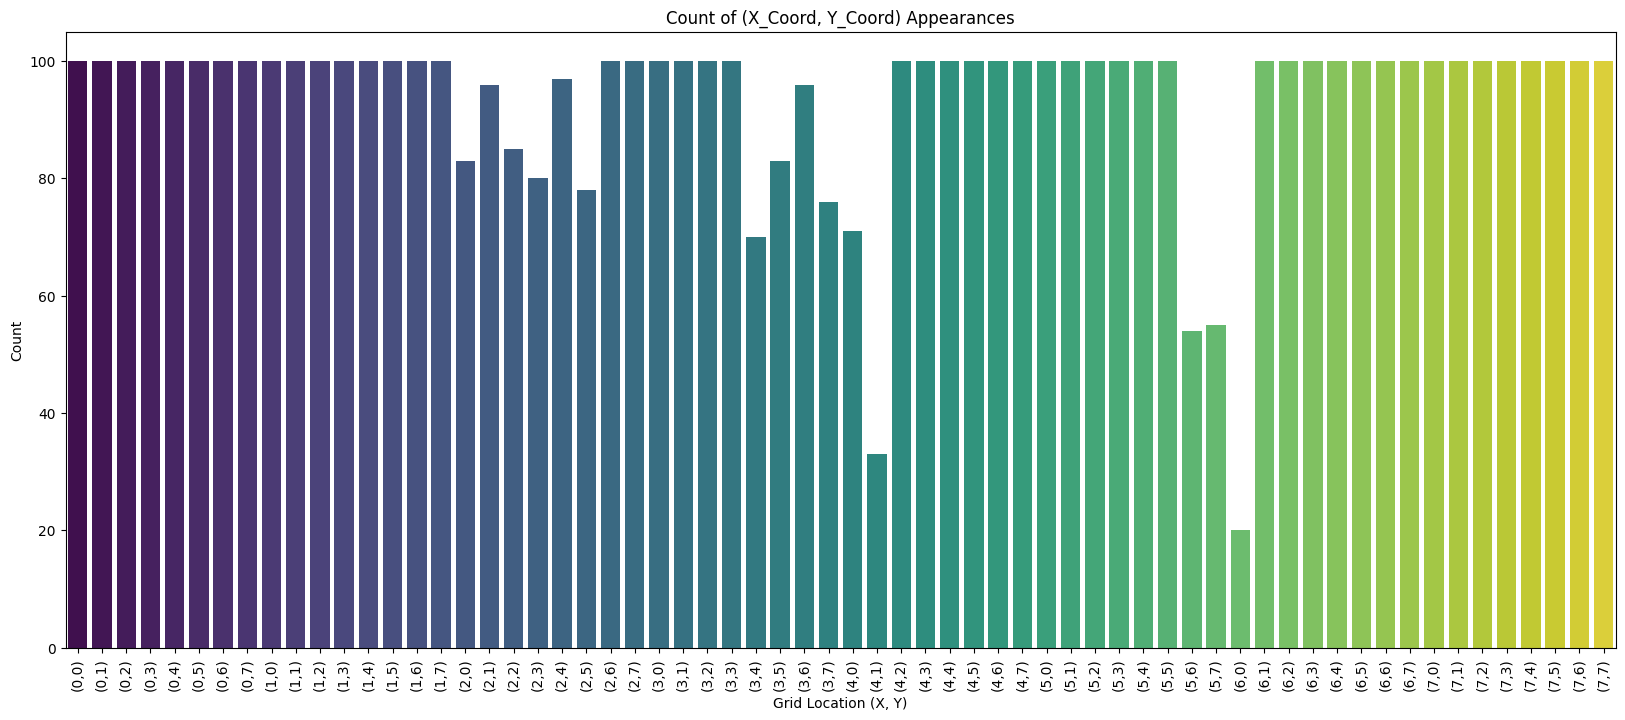

In [9]:
import seaborn as sns
x_coords = np.arange(8)  # 0 to 7
y_coords = np.arange(8)  # 0 to 7
all_locations = pd.DataFrame([(x, y) for x in x_coords for y in y_coords], columns=['X_Coord', 'Y_Coord'])

# Count occurrences of (X_Coord, Y_Coord) in combined_df
count_data = combined_df.groupby(['X_Coord', 'Y_Coord']).size().reset_index(name='Count')

# Merge with all possible locations to ensure missing ones are included
count_data = all_locations.merge(count_data, on=['X_Coord', 'Y_Coord'], how='left').fillna(0)
count_data['Count'] = count_data['Count'].astype(int)
# Convert (X_Coord, Y_Coord) to string labels
count_data['Location'] = count_data.apply(lambda row: f"({row['X_Coord']},{row['Y_Coord']})", axis=1)

# Sort for better visualization
count_data = count_data.sort_values(by=['X_Coord', 'Y_Coord'])

# Plot the bar chart
plt.figure(figsize=(20, 8))
sns.barplot(data=count_data, x="Location", y="Count", hue="Location", palette="viridis", legend=False)

plt.xlabel("Grid Location (X, Y)")
plt.ylabel("Count")
plt.title("Count of (X_Coord, Y_Coord) Appearances")
plt.xticks(rotation=90)  

plt.savefig('./figures/Train_Data.png')
plt.show()

## Resampling from minority class


# Data sampling

In [12]:
# Get the minority class
# print (all_locations)
# print(count_data)
augmentation = count_data[count_data['Count'] != 100]
print(augmentation[['X_Coord', 'Y_Coord', 'Count']])

augmentation_df = cleaned_df.merge(
    augmentation[['X_Coord', 'Y_Coord']],  # Keep only necessary columns
    on=['X_Coord', 'Y_Coord'],  
    how='inner'  # Keeps only rows that match both X_Coord and Y_Coord
)


    X_Coord  Y_Coord  Count
16        2        0     83
17        2        1     96
18        2        2     85
19        2        3     80
20        2        4     97
21        2        5     78
28        3        4     70
29        3        5     83
30        3        6     96
31        3        7     76
32        4        0     71
33        4        1     33
46        5        6     54
47        5        7     55
48        6        0     20


In [20]:
# print(augmentation_df)

resampled_data = []

for _, row in augmentation.iterrows():
    x, y, count = row['X_Coord'], row['Y_Coord'], row['Count']
    num_samples = 100 - count
    
    existing_samples = cleaned_df[cleaned_df['X_Coord'].eq(x) & cleaned_df['Y_Coord'].eq(y)]
    if not existing_samples.empty:
        # Sample randomly from existing values
        sampled_rssi = existing_samples.sample(n=num_samples, replace=True)[['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI',
                                                                              'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI',
                                                                              'Tx_6 RSSI', 'Tx_7 RSSI']].values
        
        # Create new rows
        for rssi_values in sampled_rssi:
            resampled_data.append([x, y] + list(rssi_values))

resampled_df = pd.DataFrame(resampled_data, columns=['X_Coord', 'Y_Coord', 
                                                     'Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 
                                                     'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 
                                                     'Tx_6 RSSI', 'Tx_7 RSSI'])

# Append the resampled data while keeping the original values
augmented_cleaned_df = pd.concat([cleaned_df, resampled_df], ignore_index=True)

# Display the updated dataset
print(augmented_cleaned_df.shape)

(6400, 10)
